In [10]:
# Import necessary packages
# from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
# import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
pic_size = 48
b_path = "./data/images/"

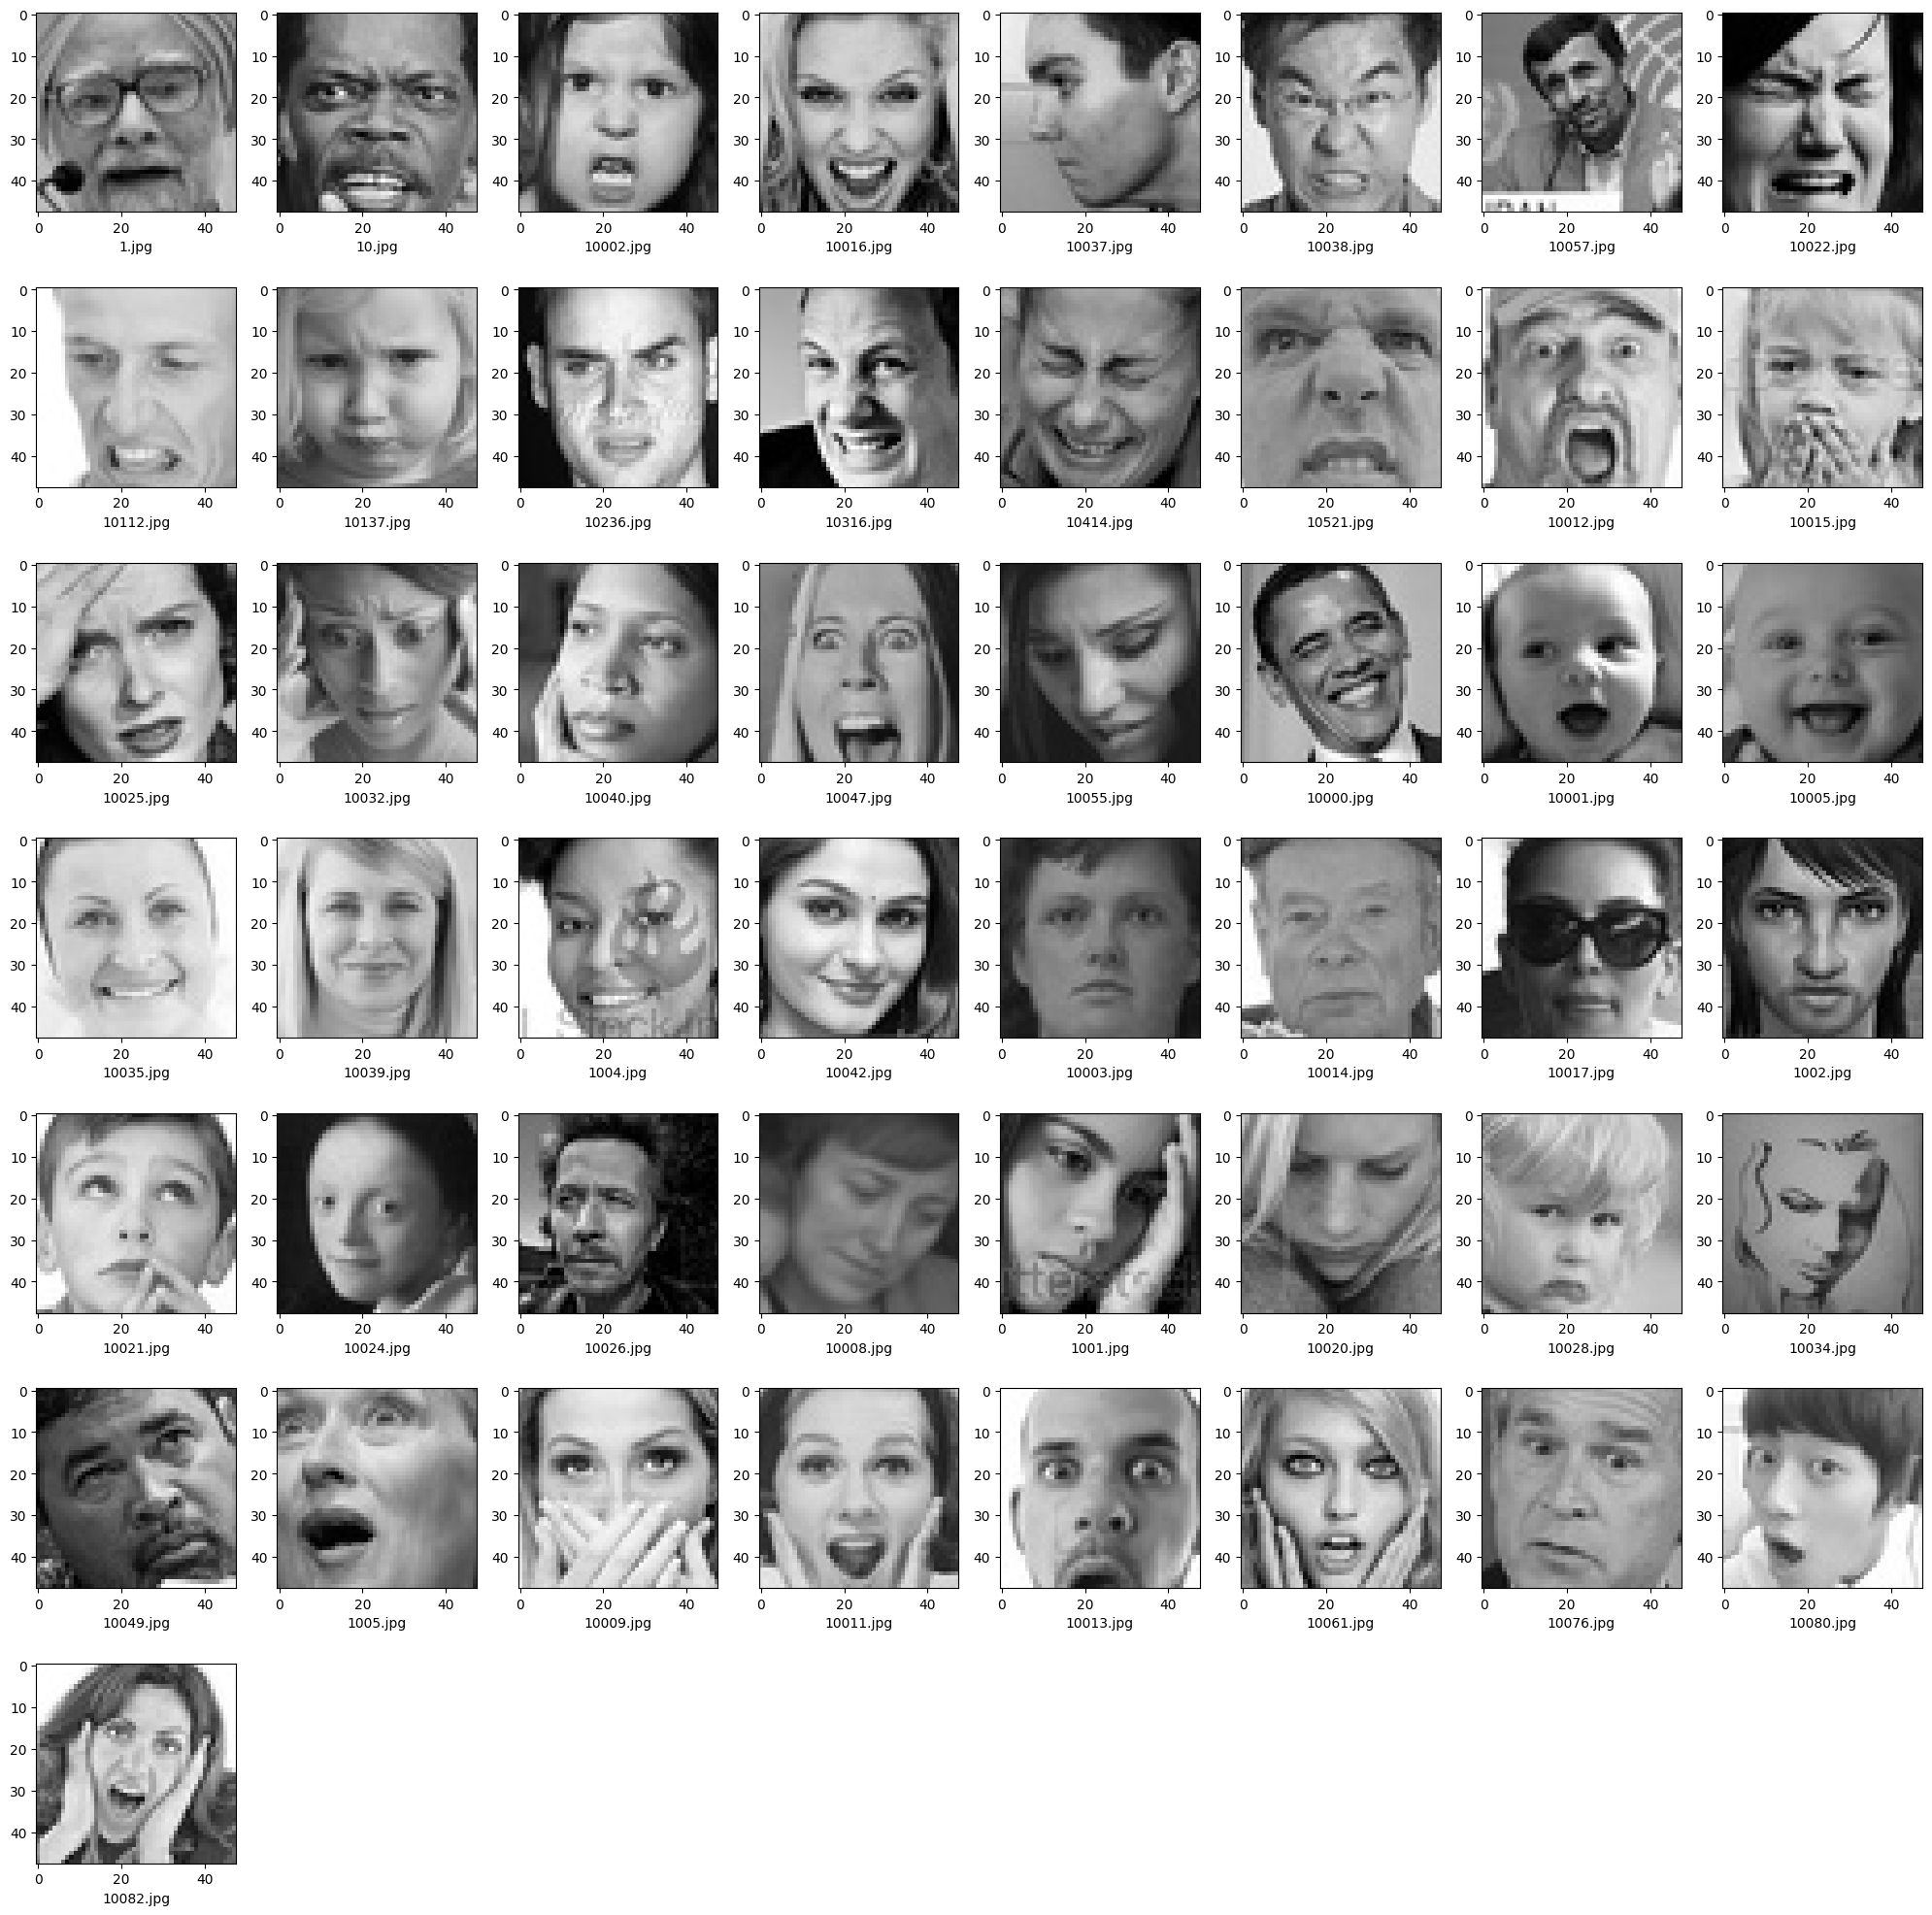

In [12]:
plt.figure(0,figsize=(20,20))
cpt=0
for expression in os.listdir(b_path + "train/"):
    for i in range(1,8):
        cpt += 1
        plt.subplot(7,8,cpt)
        img=load_img(b_path+"train/"+expression+"/"+os.listdir(b_path+"train/"+expression)[i],target_size=(pic_size,pic_size))
        plt.imshow(img,cmap='gray')
        plt.xlabel(os.listdir(b_path+"train/"+expression)[i])
plt.tight_layout()
plt.show()

In [13]:
for expression in os.listdir(b_path + "train"):
    print(str(len(os.listdir(b_path + "train/" + expression)))+" "+expression+" images")

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


In [74]:
train_dat = IDG()
val_dat = IDG()
batch_size = 128
epochs = 240
train_gen = train_dat.flow_from_directory(b_path+"train",target_size=(pic_size,pic_size)
                                          ,color_mode="grayscale",batch_size=batch_size,
                                          class_mode="categorical",shuffle=True)
val_gen = val_dat.flow_from_directory(b_path+"validation",target_size=(pic_size,pic_size),
                                       color_mode="grayscale",batch_size=batch_size,
                                       class_mode="categorical",shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [76]:
n_classes = 7
#layer 1
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 2
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 3
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 4
model.add(Conv2D(512,(3,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#FC Layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#FC Layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(n_classes,activation='softmax'))
opt = SGD(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_65 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_65 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_78 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 24, 24, 128)     

In [77]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor = "val_acc",verbose=1,
                             save_best_only=True,mode = "max")
callbacks_list = [checkpoint]
history = model.fit_generator(generator=train_gen,steps_per_epoch=train_gen.n//train_gen.batch_size
                              ,epochs=epochs,validation_data = val_gen,validation_steps=val_gen.n//val_gen.batch_size,
                             callbacks = callbacks_list)

Epoch 1/240


C:\Users\mathe\AppData\Local\Temp\ipykernel_18044\3863430605.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_gen,steps_per_epoch=train_gen.n//train_gen.batch_size


225/225 [==============================] - 31s 131ms/step - loss: 2.5652 - accuracy: 0.1349 - val_loss: 2.2553 - val_accuracy: 0.1589
Epoch 2/240
225/225 [==============================] - 29s 129ms/step - loss: 2.4260 - accuracy: 0.1463 - val_loss: 2.2278 - val_accuracy: 0.1615
Epoch 3/240
225/225 [==============================] - 29s 127ms/step - loss: 2.3282 - accuracy: 0.1601 - val_loss: 2.1450 - val_accuracy: 0.1682
Epoch 4/240
225/225 [==============================] - 29s 127ms/step - loss: 2.2597 - accuracy: 0.1701 - val_loss: 2.0803 - val_accuracy: 0.1686
Epoch 5/240
225/225 [==============================] - 29s 128ms/step - loss: 2.2212 - accuracy: 0.1780 - val_loss: 2.0446 - val_accuracy: 0.1714
Epoch 6/240
225/225 [==============================] - 29s 130ms/step - loss: 2.1740 - accuracy: 0.1837 - val_loss: 2.0050 - val_accuracy: 0.1766
Epoch 7/240
225/225 [==============================] - 29s 128ms/step - loss: 2.1498 - accuracy: 0.1929 - val_loss: 1.9815 - val_accurac

Epoch 28/240
225/225 [==============================] - 29s 127ms/step - loss: 2.0135 - accuracy: 0.2264 - val_loss: 1.8331 - val_accuracy: 0.2477
Epoch 29/240
225/225 [==============================] - 29s 127ms/step - loss: 2.0152 - accuracy: 0.2253 - val_loss: 1.8391 - val_accuracy: 0.2368
Epoch 30/240
225/225 [==============================] - 29s 127ms/step - loss: 2.0143 - accuracy: 0.2280 - val_loss: 1.8319 - val_accuracy: 0.2412
Epoch 31/240
225/225 [==============================] - 29s 127ms/step - loss: 2.0068 - accuracy: 0.2300 - val_loss: 1.8352 - val_accuracy: 0.2375
Epoch 32/240
225/225 [==============================] - 29s 127ms/step - loss: 2.0152 - accuracy: 0.2275 - val_loss: 1.8331 - val_accuracy: 0.2398
Epoch 33/240
225/225 [==============================] - 29s 128ms/step - loss: 2.0025 - accuracy: 0.2288 - val_loss: 1.8260 - val_accuracy: 0.2477
Epoch 34/240
225/225 [==============================] - 29s 127ms/step - loss: 1.9915 - accuracy: 0.2321 - val_loss: 1

225/225 [==============================] - 29s 127ms/step - loss: 1.9472 - accuracy: 0.2439 - val_loss: 1.7846 - val_accuracy: 0.2663
Epoch 55/240
225/225 [==============================] - 29s 127ms/step - loss: 1.9474 - accuracy: 0.2429 - val_loss: 1.7936 - val_accuracy: 0.2597
Epoch 56/240
225/225 [==============================] - 29s 127ms/step - loss: 1.9534 - accuracy: 0.2400 - val_loss: 1.7872 - val_accuracy: 0.2663
Epoch 57/240
225/225 [==============================] - 29s 127ms/step - loss: 1.9415 - accuracy: 0.2454 - val_loss: 1.8004 - val_accuracy: 0.2577
Epoch 58/240
225/225 [==============================] - 29s 127ms/step - loss: 1.9446 - accuracy: 0.2452 - val_loss: 1.7881 - val_accuracy: 0.2645
Epoch 59/240
225/225 [==============================] - 29s 127ms/step - loss: 1.9389 - accuracy: 0.2480 - val_loss: 1.7830 - val_accuracy: 0.2680
Epoch 60/240
225/225 [==============================] - 29s 127ms/step - loss: 1.9402 - accuracy: 0.2465 - val_loss: 1.7797 - val_a

225/225 [==============================] - 29s 128ms/step - loss: 1.8641 - accuracy: 0.2730 - val_loss: 1.7329 - val_accuracy: 0.3004
Epoch 108/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8635 - accuracy: 0.2684 - val_loss: 1.7415 - val_accuracy: 0.2937
Epoch 109/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8553 - accuracy: 0.2774 - val_loss: 1.7366 - val_accuracy: 0.2960
Epoch 110/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8545 - accuracy: 0.2732 - val_loss: 1.7341 - val_accuracy: 0.2979
Epoch 111/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8548 - accuracy: 0.2757 - val_loss: 1.7435 - val_accuracy: 0.2926
Epoch 112/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8642 - accuracy: 0.2726 - val_loss: 1.7198 - val_accuracy: 0.3065
Epoch 113/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8559 - accuracy: 0.2771 - val_loss: 1.7233 -

Epoch 134/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8308 - accuracy: 0.2861 - val_loss: 1.7000 - val_accuracy: 0.3200
Epoch 135/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8282 - accuracy: 0.2870 - val_loss: 1.7176 - val_accuracy: 0.3084
Epoch 136/240
225/225 [==============================] - 29s 129ms/step - loss: 1.8239 - accuracy: 0.2877 - val_loss: 1.7151 - val_accuracy: 0.3104
Epoch 137/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8270 - accuracy: 0.2871 - val_loss: 1.7109 - val_accuracy: 0.3132
Epoch 138/240
225/225 [==============================] - 29s 129ms/step - loss: 1.8245 - accuracy: 0.2867 - val_loss: 1.7163 - val_accuracy: 0.3105
Epoch 139/240
225/225 [==============================] - 29s 128ms/step - loss: 1.8201 - accuracy: 0.2857 - val_loss: 1.7161 - val_accuracy: 0.3098
Epoch 140/240
225/225 [==============================] - 29s 129ms/step - loss: 1.8169 - accuracy: 0.2898 - val_

225/225 [==============================] - 29s 129ms/step - loss: 1.7977 - accuracy: 0.2973 - val_loss: 1.6903 - val_accuracy: 0.3310
Epoch 161/240
225/225 [==============================] - 29s 128ms/step - loss: 1.7937 - accuracy: 0.2973 - val_loss: 1.6844 - val_accuracy: 0.3386
Epoch 162/240
225/225 [==============================] - 29s 129ms/step - loss: 1.7970 - accuracy: 0.2971 - val_loss: 1.6934 - val_accuracy: 0.3291
Epoch 163/240
225/225 [==============================] - 29s 128ms/step - loss: 1.7972 - accuracy: 0.3015 - val_loss: 1.6823 - val_accuracy: 0.3344
Epoch 164/240
225/225 [==============================] - 29s 127ms/step - loss: 1.7919 - accuracy: 0.2966 - val_loss: 1.6873 - val_accuracy: 0.3332
Epoch 165/240
225/225 [==============================] - 29s 128ms/step - loss: 1.7896 - accuracy: 0.2983 - val_loss: 1.6878 - val_accuracy: 0.3325
Epoch 166/240
225/225 [==============================] - 29s 128ms/step - loss: 1.7889 - accuracy: 0.2992 - val_loss: 1.6844 -

Epoch 187/240
225/225 [==============================] - 30s 133ms/step - loss: 1.7663 - accuracy: 0.3108 - val_loss: 1.6664 - val_accuracy: 0.3474
Epoch 188/240
225/225 [==============================] - 29s 130ms/step - loss: 1.7690 - accuracy: 0.3116 - val_loss: 1.6603 - val_accuracy: 0.3469
Epoch 189/240
225/225 [==============================] - 35s 155ms/step - loss: 1.7622 - accuracy: 0.3128 - val_loss: 1.6551 - val_accuracy: 0.3489
Epoch 190/240
225/225 [==============================] - 40s 178ms/step - loss: 1.7647 - accuracy: 0.3120 - val_loss: 1.6623 - val_accuracy: 0.3473
Epoch 191/240
225/225 [==============================] - 34s 151ms/step - loss: 1.7621 - accuracy: 0.3137 - val_loss: 1.6668 - val_accuracy: 0.3466
Epoch 192/240
225/225 [==============================] - 33s 148ms/step - loss: 1.7567 - accuracy: 0.3114 - val_loss: 1.6750 - val_accuracy: 0.3415
Epoch 193/240
225/225 [==============================] - 39s 172ms/step - loss: 1.7684 - accuracy: 0.3107 - val_

225/225 [==============================] - 36s 159ms/step - loss: 1.7471 - accuracy: 0.3188 - val_loss: 1.6570 - val_accuracy: 0.3486
Epoch 214/240
225/225 [==============================] - 37s 165ms/step - loss: 1.7393 - accuracy: 0.3213 - val_loss: 1.6444 - val_accuracy: 0.3558
Epoch 215/240
225/225 [==============================] - 36s 159ms/step - loss: 1.7424 - accuracy: 0.3212 - val_loss: 1.6389 - val_accuracy: 0.3584
Epoch 216/240
225/225 [==============================] - 35s 156ms/step - loss: 1.7386 - accuracy: 0.3227 - val_loss: 1.6478 - val_accuracy: 0.3533
Epoch 217/240
225/225 [==============================] - 35s 154ms/step - loss: 1.7363 - accuracy: 0.3243 - val_loss: 1.6370 - val_accuracy: 0.3597
Epoch 218/240
225/225 [==============================] - 32s 143ms/step - loss: 1.7313 - accuracy: 0.3249 - val_loss: 1.6373 - val_accuracy: 0.3608
Epoch 219/240
225/225 [==============================] - 32s 144ms/step - loss: 1.7374 - accuracy: 0.3253 - val_loss: 1.6515 -

Epoch 240/240
225/225 [==============================] - 34s 151ms/step - loss: 1.7153 - accuracy: 0.3325 - val_loss: 1.6142 - val_accuracy: 0.3710


In [78]:
model.save("model_SGD_L2_BS128_E240.h5")
# history.history['loss']

In [79]:
accuracy = history.history['accuracy']
max_accuracy = max(accuracy)

val_accuracy = history.history['val_accuracy']
max_val_accuracy = max(val_accuracy)

loss = history.history['loss']
min_loss = min(loss)

val_loss = history.history['val_loss']
min_val_loss = min(val_loss)

print("max_accuracy: " + str(max_accuracy) + "\n"
     + "max_val_accuracy: " + str(max_val_accuracy) + "\n"
     + "min_loss: " + str(min_loss) + "\n"
     + "min_val_loss: " + str(min_val_loss))

max_accuracy: 0.3355870842933655
max_val_accuracy: 0.3710227310657501
min_loss: 1.715317964553833
min_val_loss: 1.6141973733901978


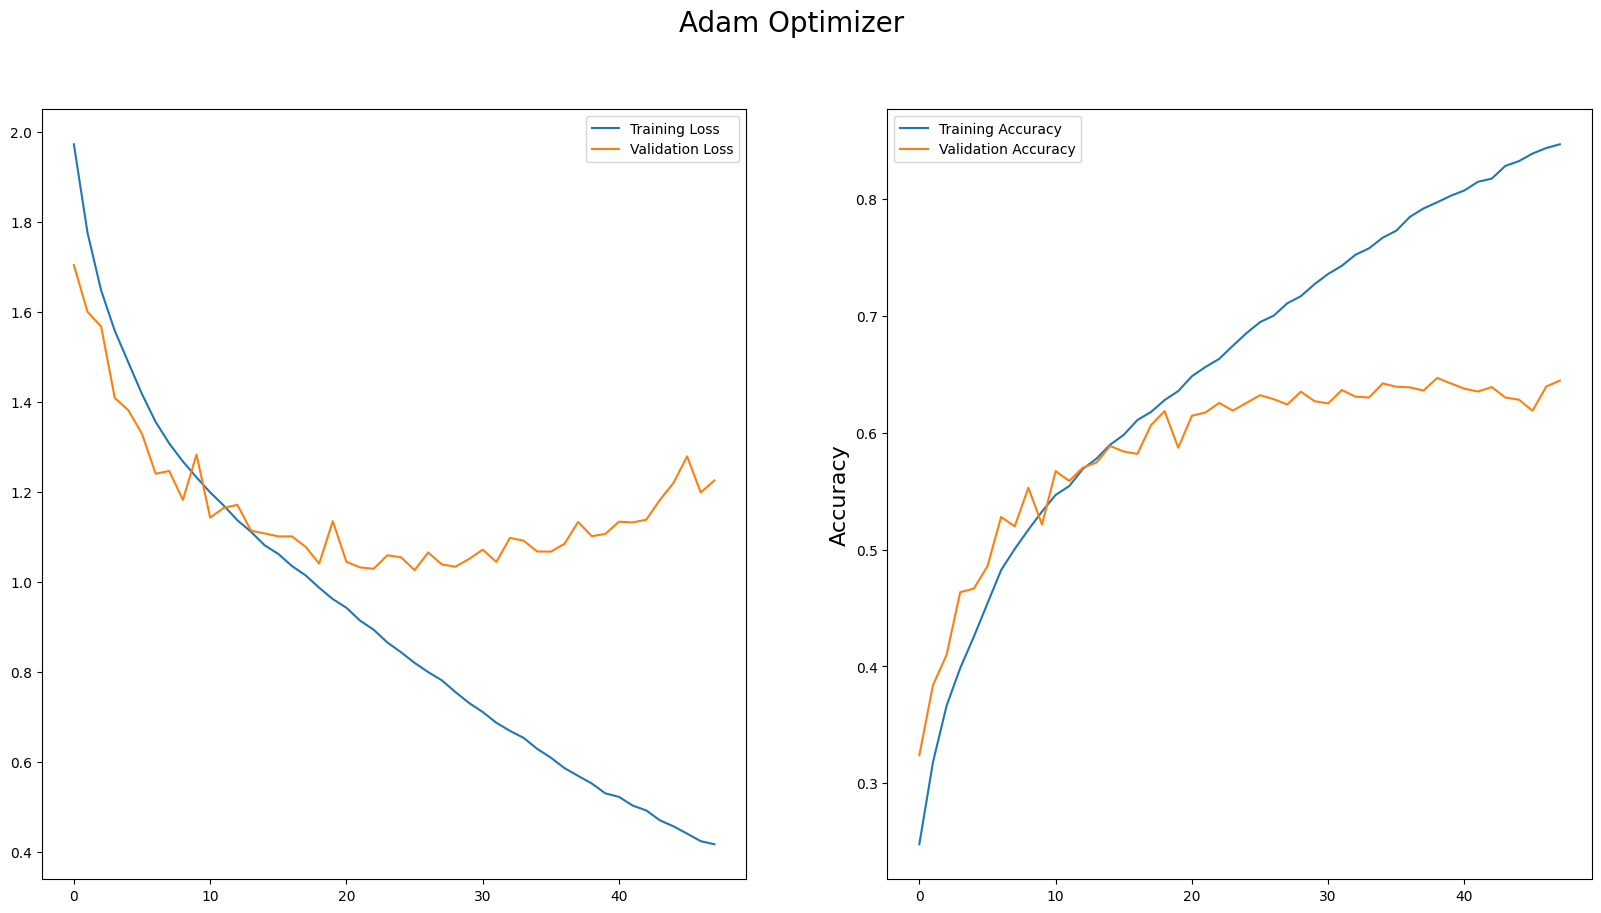

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Adam Optimizer',fontsize=20)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.ylabel("Accuracy",fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.show()